In [1]:
import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
#import cv2
#from PIL import Image
import random
import datetime
import io
#from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import json

#from models.deeplab import *
#from data_generators.datasets import deepfashion
import argparse
#from utils.datagen_utils import denormalize_image
import yaml
from PIL import Image

from predictors.predictor import Predictor

%matplotlib inline

### Load configs

In [5]:
with open("../configs/config.yml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    
config['dataset']['base_path'] = '../' + config['dataset']['base_path']

### Load dataset

In [23]:
with open('../../../datasets/brain_tumor/train_val_test.json') as json_file:
    dataset = json.load(json_file)

In [25]:
#dataset

In [52]:
predictor = Predictor(config, checkpoint_path='../experiments/checkpoint_last.pth.tar')
num_classes = predictor.num_classes

Number of images in train: 2764
Number of images in val: 146
Number of images in test: 154


### Load test set names

In [54]:
#dataset['test']

In [89]:
index = random.randint(0, len(dataset['test'])-1)

file_name = '../../../datasets/brain_tumor/images/' + dataset['test'][index]['image']
annotation_name = '../../../datasets/brain_tumor/labels/' + dataset['test'][index]['annotation']
annotation = Image.open(annotation_name)

image, prediction = predictor.segment_image(file_name)

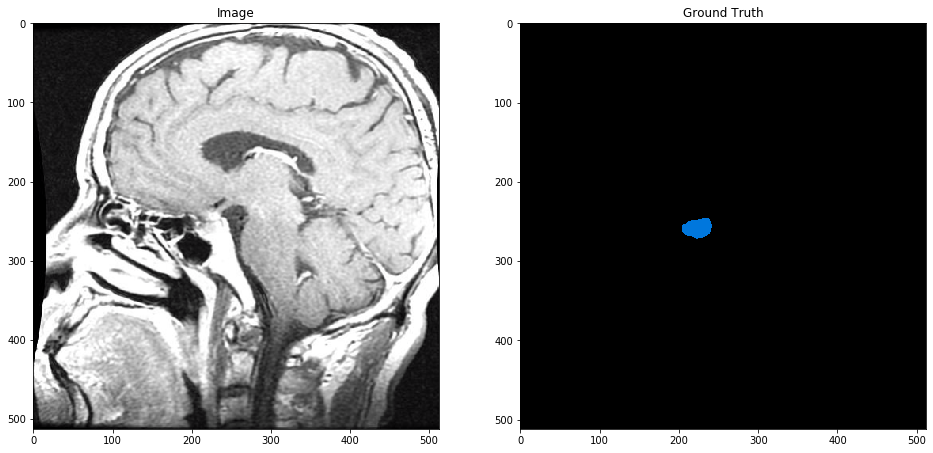

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(16, 16))

images = []

axs[0].set_title("Image")
axs[1].set_title("Ground Truth")

images.append(axs[0].imshow(image.astype(int)))
images.append(axs[1].imshow(annotation, cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=num_classes))
#images.append(axs[2].imshow(pred_classes, cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=num_classes))
    
#cbar = fig.colorbar(images[2], ax=axs, orientation='horizontal', ticks=[x for x in range(num_classes)], fraction=.1)
#cbar.ax.set_xticklabels([value for (key, value) in dataset['labels'].items()], rotation=55)

#plt.show()
#plt.savefig("../figures/pred_3.jpg")
#print(dataset['labels'])

In [65]:
#annotation